## Problem 1

In [172]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#### Import Dataset

In [173]:
abalones = pd.read_excel('quizData_SetE.xlsx', sheet_name = 'in', header = 0)
abalones.head()

,Height,Weight,Diameter,Price
0,0.010,0.0015,0.055,Low
1,0.025,0.0050,0.100,Low
2,0.030,0.0040,0.100,Low
3,0.030,0.0030,0.090,Low
4,0.030,0.0050,0.120,Low


In [174]:
abalones.head()

,Height,Weight,Diameter,Price
0,0.010,0.0015,0.055,Low
1,0.025,0.0050,0.100,Low
2,0.030,0.0040,0.100,Low
3,0.030,0.0030,0.090,Low
4,0.030,0.0050,0.120,Low


In [175]:
height = pd.DataFrame(abalones['Height'])
weight = pd.DataFrame(abalones['Weight'])
diameter = pd.DataFrame(abalones['Diameter'])
price = pd.DataFrame(abalones['Price'])

In [176]:
price.head()

,Price
0,Low
1,Low
2,Low
3,Low
4,Low


<AxesSubplot:>

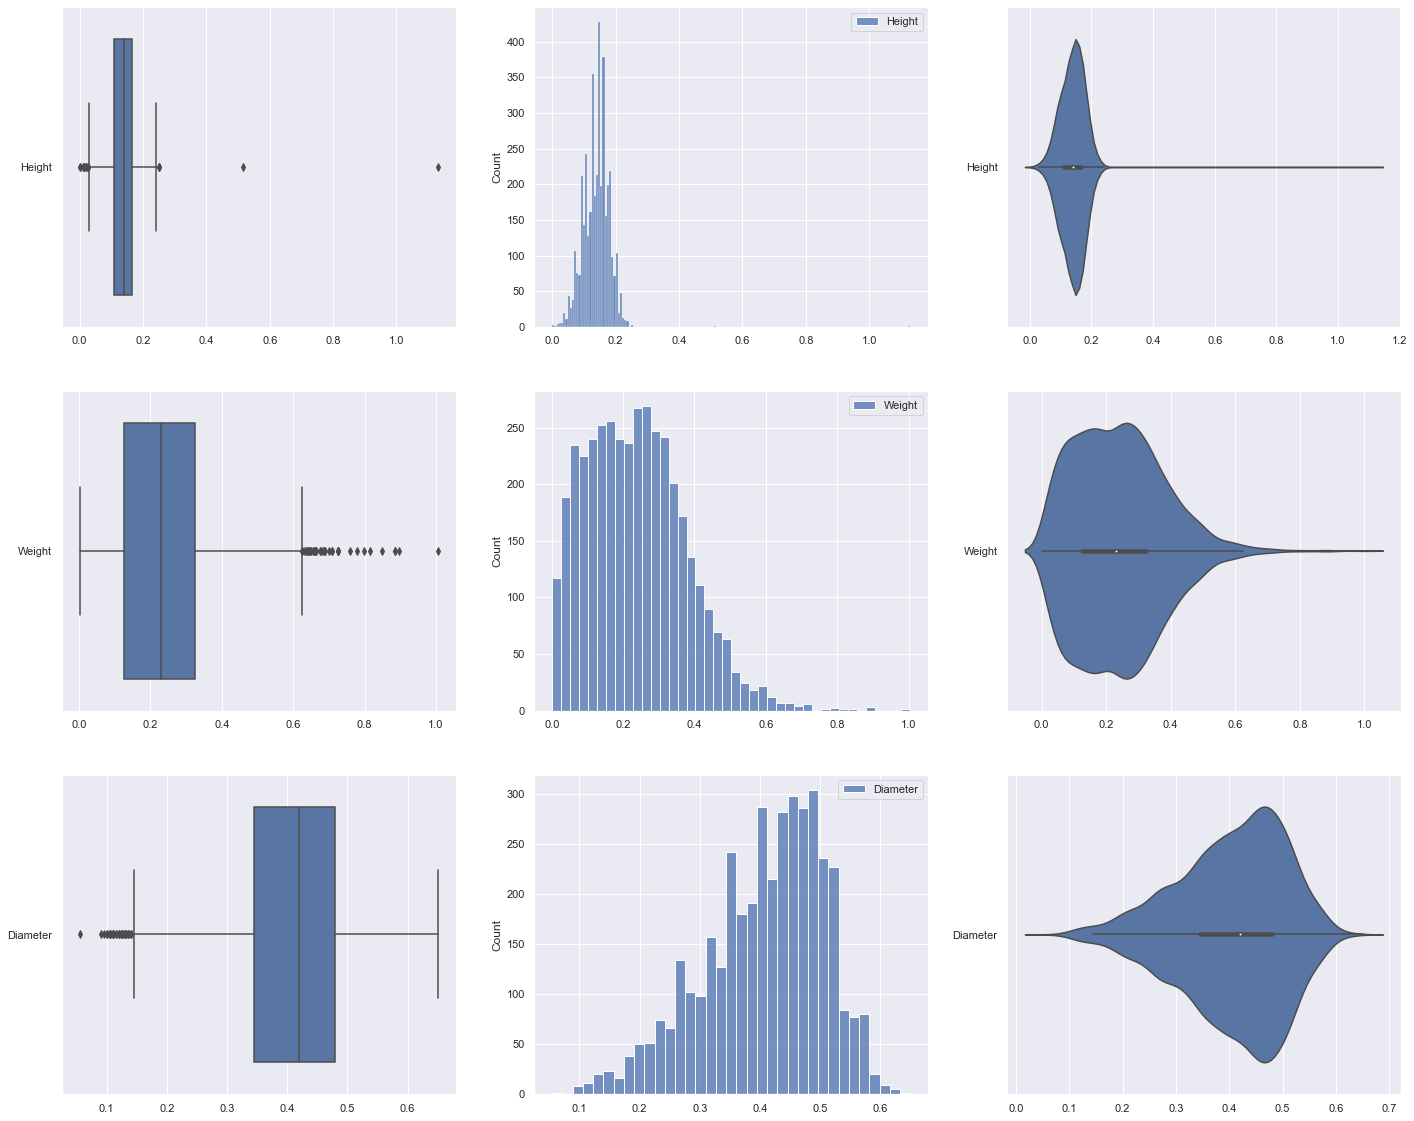

In [177]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 20))

# Plot the basic uni-variate figures for numerical variables
sb.boxplot(data = height, orient = "h", ax = axes[0,0])
sb.histplot(data = height, ax = axes[0,1])
sb.violinplot(data = height, orient = "h", ax = axes[0,2])

sb.boxplot(data = weight, orient = "h", ax = axes[1,0])
sb.histplot(data = weight, ax = axes[1,1])
sb.violinplot(data = weight, orient = "h", ax = axes[1,2])

sb.boxplot(data = diameter, orient = "h", ax = axes[2,0])
sb.histplot(data = diameter, ax = axes[2,1])
sb.violinplot(data = diameter, orient = "h", ax = axes[2,2])


Comment: Weight has the biggest number of outliers

<Figure size 1152x576 with 0 Axes>

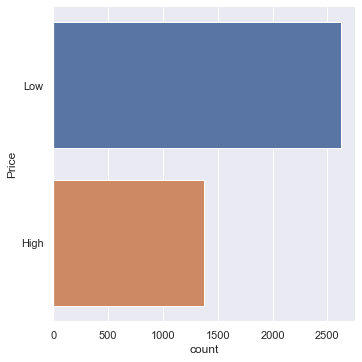

In [178]:
f = plt.figure(figsize=(16, 8))
sb.catplot(y='Price', data = price, kind = "count")

In [179]:
print(price["Price"].dropna().value_counts())

Low     2623
High    1377
Name: Price, dtype: int64


Therefore ratio of Low:High = 1.90.

In [180]:
abalones.corr()

,Height,Weight,Diameter
Height,1.000000,0.815176,0.831975
Weight,0.815176,1.000000,0.905535
Diameter,0.831975,0.905535,1.000000


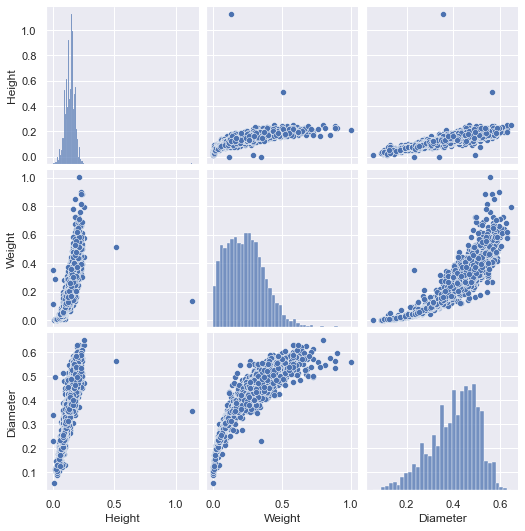

In [181]:
sb.pairplot(abalones)

## Problem 2: Uni-Variate Decision Tree

In [182]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### PRICE VS HEIGHT

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.72

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7233333333333334



<AxesSubplot:>

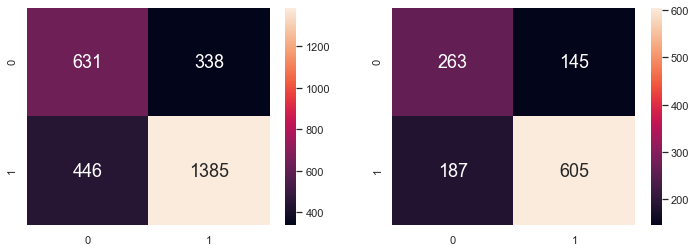

In [183]:
height_train, height_test, price_train, price_test = train_test_split(height, price, test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(height_train, price_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
price_train_pred = dectree.predict(height_train)
price_test_pred = dectree.predict(height_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(height_train, price_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(height_test, price_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(price_train, price_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(price_test, price_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

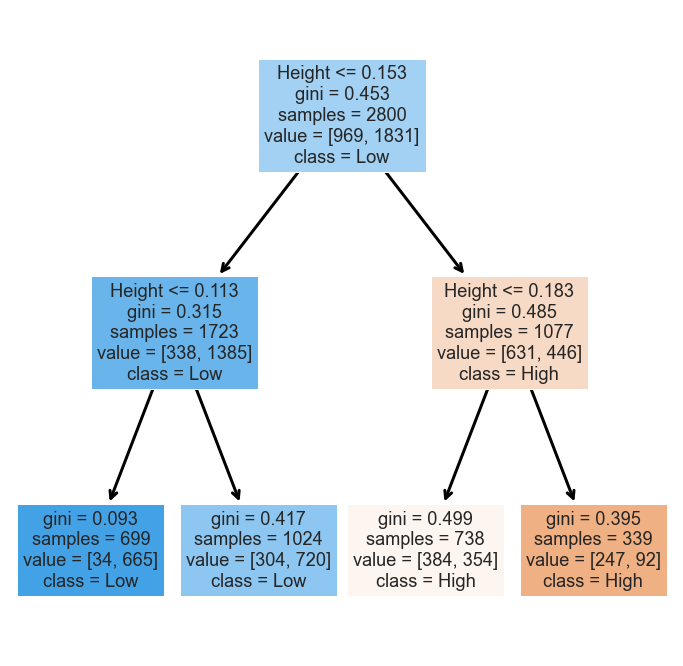

In [184]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = height_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### PRICE VS WEIGHT

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7285714285714285

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7241666666666666



<AxesSubplot:>

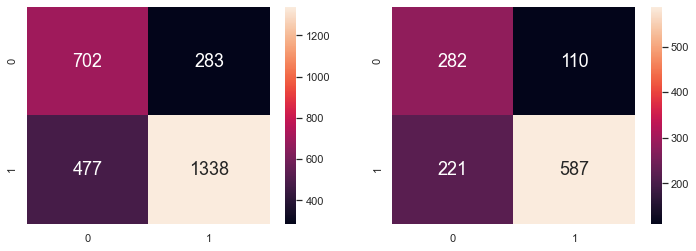

In [185]:
weight_train, weight_test, price_train, price_test = train_test_split(weight, price, test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(weight_train, price_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
price_train_pred = dectree.predict(weight_train)
price_test_pred = dectree.predict(weight_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(weight_train, price_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(weight_test, price_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(price_train, price_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(price_test, price_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

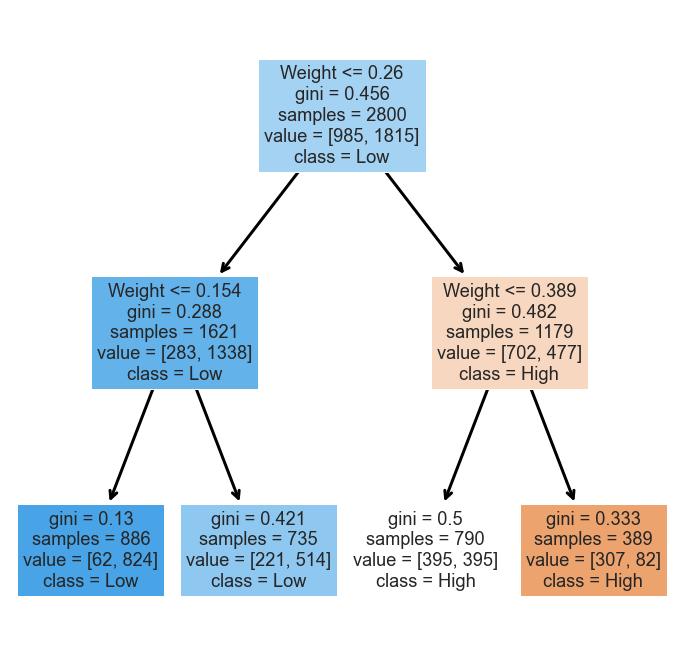

In [186]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = weight_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### PRICE VS DIAMETER

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7317857142857143

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.69



<AxesSubplot:>

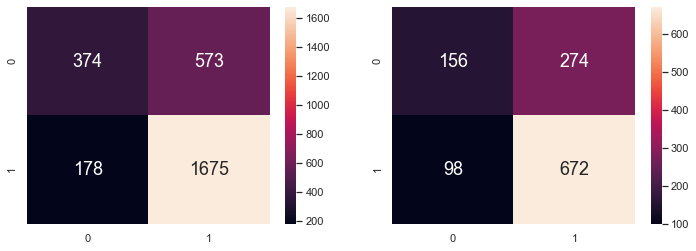

In [187]:
diameter_train, diameter_test, price_train, price_test = train_test_split(diameter, price, test_size=0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(diameter_train, price_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
price_train_pred = dectree.predict(diameter_train)
price_test_pred = dectree.predict(diameter_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(diameter_train, price_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(diameter_test, price_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(price_train, price_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(price_test, price_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

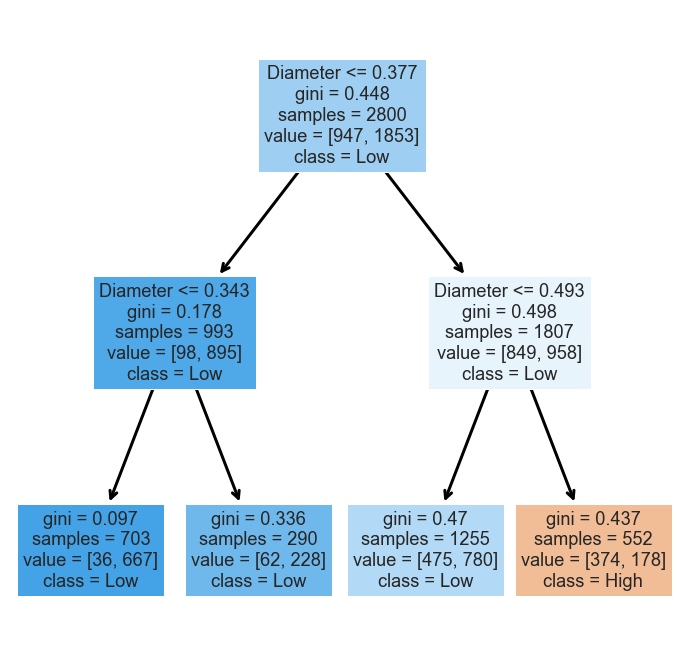

In [188]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = diameter_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Comment: Height is the best in terms of predicting Price due to it's high gini coefficient.

## Problem 3

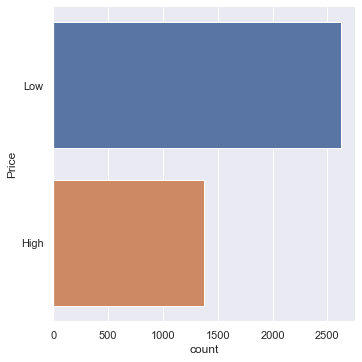

In [189]:
jointplot = pd.concat([price, multiPred], axis=1)

sb.catplot(data=jointplot, kind='count', y='Price')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.765

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7458333333333333



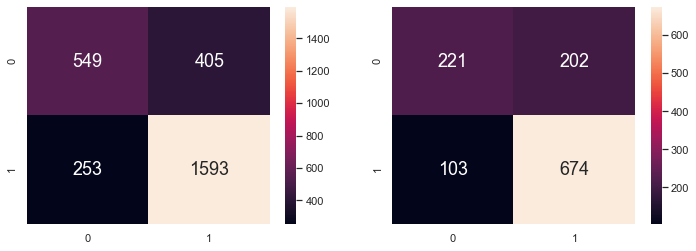

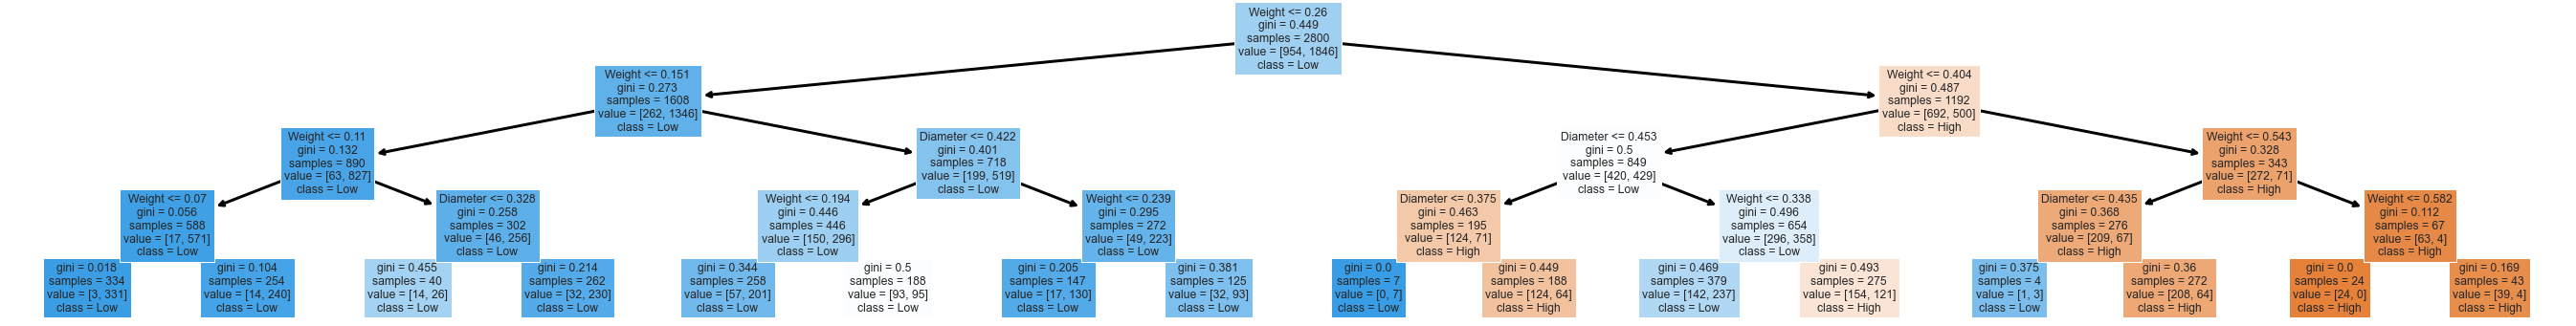

In [190]:
# Extract Response and Predictors
y = pd.DataFrame(abalones["Price"])
X = pd.DataFrame(abalones[["Height", "Weight", "Diameter"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9807142857142858

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6883333333333334



<AxesSubplot:>

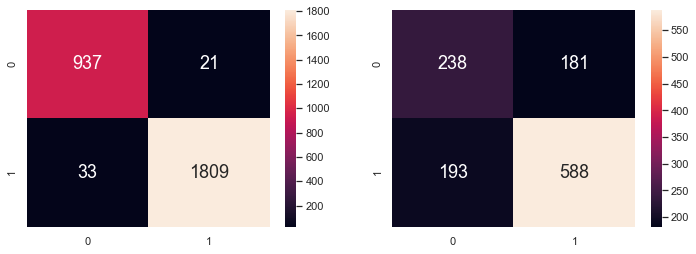

In [191]:
# Extract Response and Predictors
a = pd.DataFrame(abalones["Price"])
b = pd.DataFrame(abalones[["Height", "Weight", "Diameter"]])

# Split the Dataset into Train and Test
b_train, b_test, a_train, a_test = train_test_split(b, a, test_size = 0.3)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(b_train, a_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
a_train_pred = dectree.predict(b_train)
a_test_pred = dectree.predict(b_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(b_train, a_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(b_test, a_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(a_train, a_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(a_test, a_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



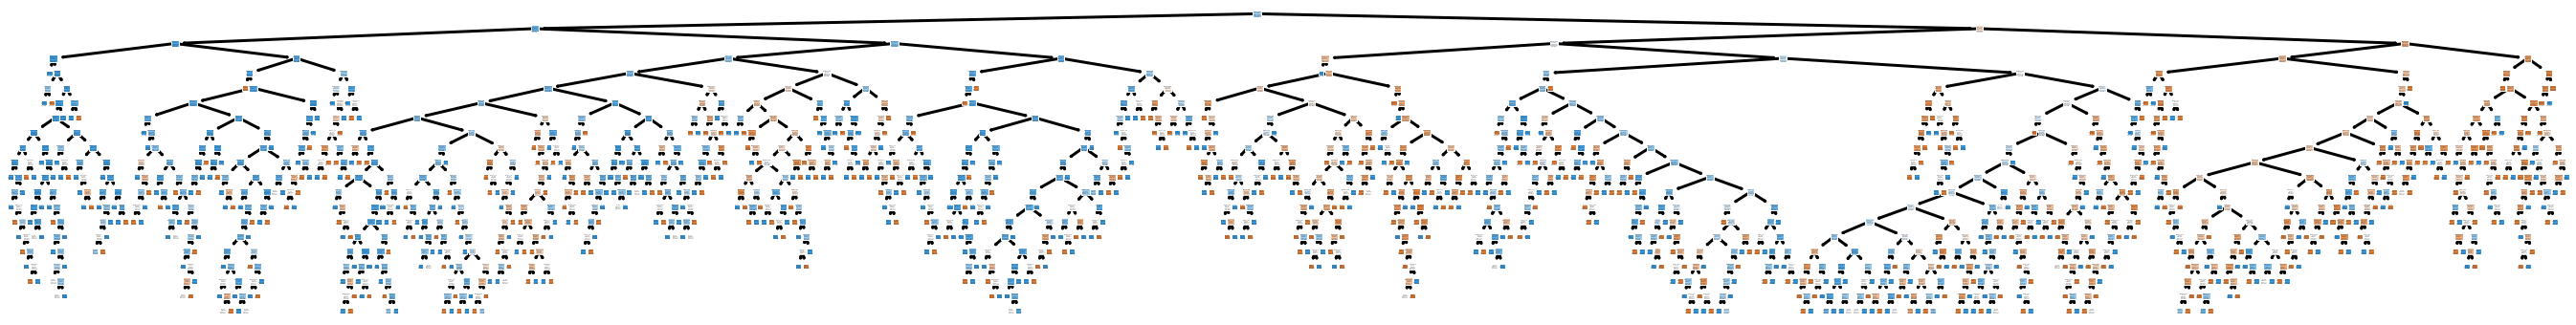

In [192]:
# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = b_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Comment: With max_depth=20, it is a better model than 3(a) as there is lesser false positive and negatives which improves the accuracy.